<a href="https://colab.research.google.com/github/thiepwong/fire-detector/blob/main/FireDetectorML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Thiết lập và cài đặt thư viện liên quan**



In [ ]:
# Xóa hết các folder data dữ liệu sẵn
%rm -rf /content/my_images_labels
%rm -rf /content/my_images_labels.zip

In [ ]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print() 

In [ ]:
from IPython.core.display import TextDisplayObject
!git clone https://github.com/ultralytics/yolov5.git
%pip install --upgrade pip

Cloning into 'yolov5'...
remote: Enumerating objects: 12173, done.
remote: Total 12173 (delta 0), reused 0 (delta 0), pack-reused 12173
Receiving objects: 100% (12173/12173), 11.96 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (8428/8428), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow
import torch
import os
from IPython.display import Image, clear_output

print(f'Đã cài đặt xong, đang sử dụng phiên bản {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else "CPU"})')

## **Khởi tạo file data.yaml**
File này sẽ tải assets lên hệ thống từ url

In [ ]:
%cd /content/yolov5
with open('/content/yolov5/data/fire_detect.yaml', 'w+') as file:
    file.write(
        """
        train: /content/yolov5/my_images_labels/images/trains
        val: /content/yolov5/my_images_labels/images/valids

        nc: 1
        names: ['Ngọn lửa']

        download: https://github.com/thiepwong/fire-detector/blob/main/my_images_labels.zip?raw=true
        #Tải file về từ trên url (đã upload lên đây sẵn)
        """
    )

### **Tải lên 1 tệp dữ liệu định dạng Yolo**

In [ ]:
# Xóa tệp nếu đã tồn tại
!rm -r /content/yolov5/my_images_labels.zip
# Tải về từ github
!wget -O my_images_labels.zip https://github.com/thiepwong/fire-detector/blob/main/my_images_labels.zip?raw=true
# Giải nén
!unzip /content/yolov5/my_images_labels.zip

## Huấn luyện nhân diện


In [ ]:
from yolov5 import train

train.run(img=416, batch=32, epochs=200, data='/content/yolov5/data/fire_detect.yaml', name='fires', cache='ram' )

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/fire_detect.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=fires, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, img=416, batch=32
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: matplotlib>=3.2.2 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: http

  0%|          | 0.00/22.2M [00:00<?, ?B/s]

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Overriding model.yaml nc=80 with nc=1

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]            

In [ ]:
!python train.py --img 416 --batch 16 --epochs 200 --data /content/yolov5/data/fire_detect.yaml  --weights  runs/train/exp/weights/best.pt --cache

Kiểm thử

In [ ]:
from . import detect




In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.4 --source /content/yolov5/my_images_labels/images/test/

## **Hiển thị kết quả kiểm thử**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

from os import walk
result_path = '/content/yolov5/runs/detect/exp2/'
filenames = next(walk(result_path), (None, None, []))[2]  # [] if no file
#print(filenames)
for file in filenames:
  im = cv.imread("%s%s" % (result_path, file))
  cv2_imshow(im)


YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs


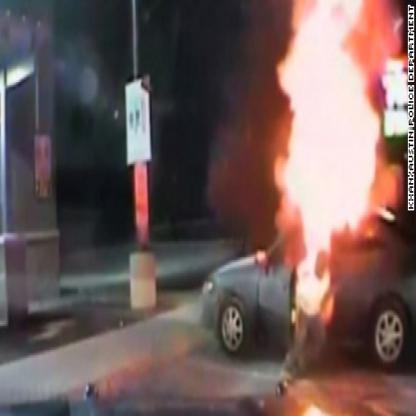

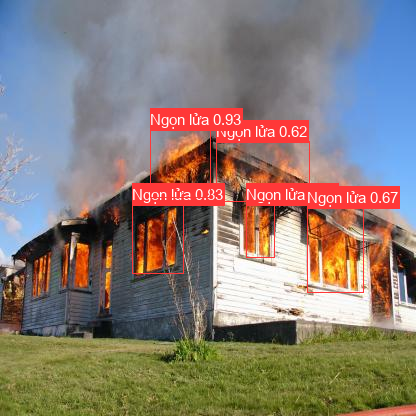

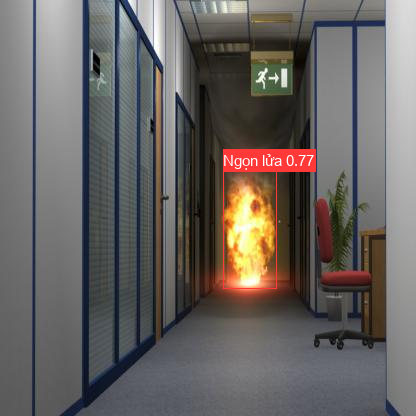

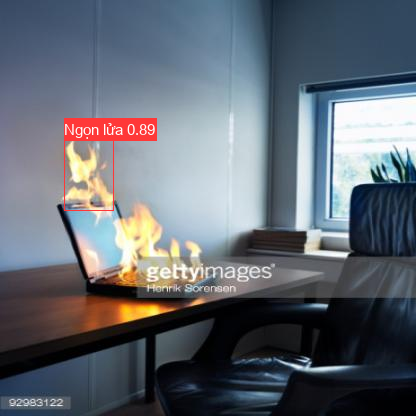

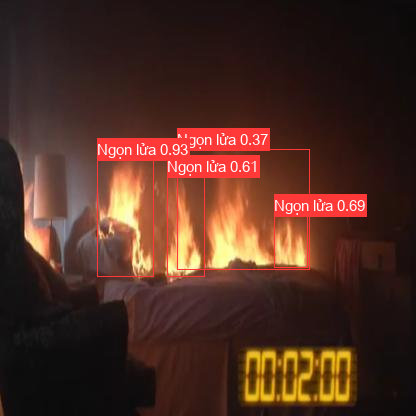

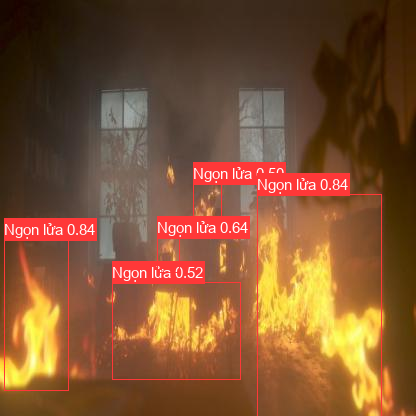

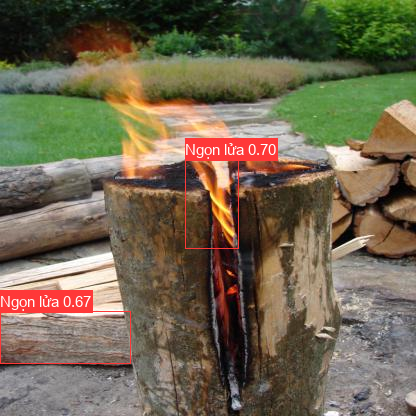

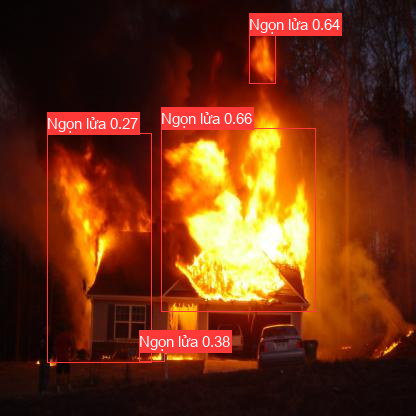

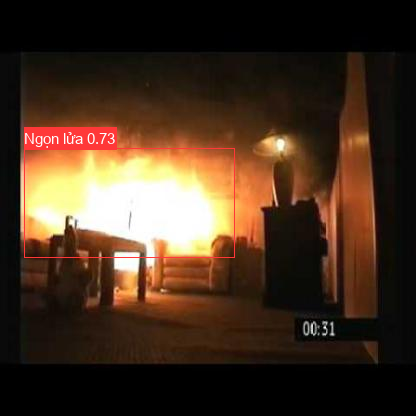

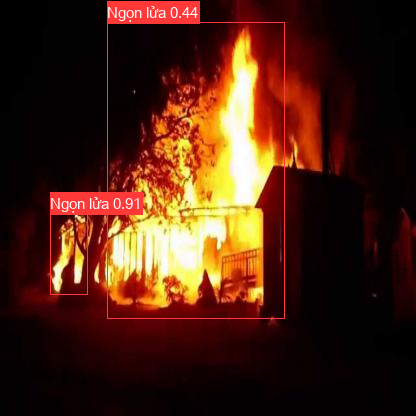

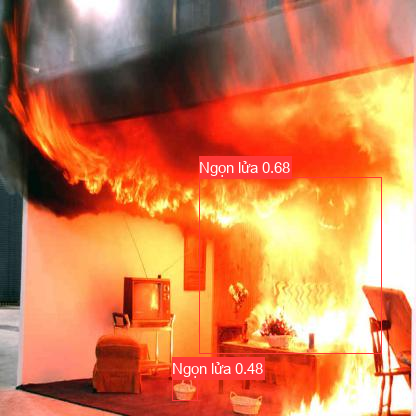

Speed: 0.7ms pre-process, 15.5ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/yolov5/runs/detect/exp32


In [ ]:
 
import argparse
import os
import sys
from pathlib import Path
from google.colab.patches import cv2_imshow
import torch
import torch.backends.cudnn as cudnn 
from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
from IPython.display import Image, display


@torch.no_grad()
def run(
        weights='/content/yolov5/yolov5s.pt',  # model.pt path(s)
        source=   '/content/yolov5/data/images',  # file/dir/URL/glob, 0 for webcam
        data=  '/content/yolov5/data/coco128.yaml',  # dataset.yaml path
        imgsz=(640, 640),  # inference size (height, width)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=   '/content/yolov5/runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # warmup
    dt, seen = [0.0, 0.0, 0.0], 0
    for path, im, im0s, vid_cap, s in dataset:
        t1 = time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
        im /= 255  # 0 - 255 to 0.0 - 1.0
        if len(im.shape) == 3:
            im = im[None]  # expand for batch dim
        t2 = time_sync()
        dt[0] += t2 - t1

        # Inference
        visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
        pred = model(im, augment=augment, visualize=visualize)
        t3 = time_sync()
        dt[1] += t3 - t2

        # NMS
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(f'{txt_path}.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)

            # Stream results
            im0 = annotator.result()
            if view_img: 
                cv2_imshow(im0) 
                cv2.waitKey(1)   
 
    # Print results
    t = tuple(x / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights)  # update model (to fix SourceChangeWarning)
 
run( weights='/content/yolov5/runs/train/exp2/weights/best.pt',  
        source=   '/content/yolov5/my_images_labels/images/test/',   
        project=   '/content/yolov5/runs/detect',  
        name='fire',  
        line_thickness=1, view_img=True)

 
 
